**Dataset is unlabeled, we proceed with unsupervised learning method: clustering (for outlier detection)**

In [132]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

**Functions:**

In [133]:
def count_plot(length, width, xlabel, ylabel, title, given, col_name,hue=None, palette="dark", rotation=0, order=None, show_values=False):
      plt.figure(figsize=(length,width))
      ax=sns.countplot(data=given, x=col_name,hue=hue, palette=palette, order=order)
      plt.xlabel(xlabel)
      plt.ylabel(ylabel)
      plt.title(title)
      plt.xticks(rotation=rotation)
      if show_values:
            for p in ax.patches:
                  height=p.get_height()
                  ax.annotate(f"{height}", (p.get_x()+p.get_width()/2., height), ha='center', va='bottom', fontsize=10)
      plt.tight_layout()
      plt.show()
      return

def bar_plot(length, width, xlabel, ylabel, title, X, Y, Data, palette="dark", rotation=0, show_values=False):
      plt.figure(figsize=(length,width))
      ax=sns.barplot(x=X, y=Y, data=Data, palette=palette)
      plt.xlabel(xlabel)
      plt.ylabel(ylabel)
      plt.title(title)
      plt.xticks(rotation=rotation)
      if show_values:
            for p in ax.patches:
                  height=p.get_height()
                  ax.annotate(f"{height}", (p.get_x()+p.get_width()/2., height), ha='center', va='bottom', fontsize=10)
      plt.tight_layout()
      plt.show()
      return

def histplot(length, width, xlabel, ylabel, title, given, col_name, bins=10, kde=False, palette="dark", rotation=0):
      plt.figure(figsize=(length, width))
      ax=sns.histplot(data=given, x=col_name, bins=bins, kde=kde, palette=palette)
      plt.xlabel(xlabel)
      plt.ylabel(ylabel)
      plt.title(title)
      plt.xticks(rotation=rotation)
      plt.tight_layout()
      plt.show()
      return

def scatter_plot(length, width, xlabel, ylabel, title, given, x, y,size='LoginAttempts', sizes=(20, 200), palette=[ '#e67e22'], rotation=0, show_values=False):
      plt.figure(figsize=(length,width))
      ax=sns.scatterplot(x=x, y=y, data=given,size='LoginAttempts', sizes=(20, 200), palette=palette)
      plt.xlabel(xlabel)
      plt.ylabel(ylabel)
      plt.title(title)
      plt.xticks(rotation=rotation)
      if show_values:
            for p in ax.patches:
                  height=p.get_height()
                  ax.annotate(f"{height}", (p.get_x()+p.get_width()/2., height), ha='center', va='bottom', fontsize=10)
      plt.tight_layout()
      plt.show()
      return

In [134]:
#dataset=pd.read_csv("bank_transactions_data_2.csv")

**1.EDA- Exploratory Data Analysis**

In [135]:
#We only want to take debit transactions into account
#data1=dataset[dataset['TransactionType']=='Debit']
#data1.to_csv('debit.csv')

In [136]:
dataset=pd.read_csv("debit.csv")

In [137]:
dataset.head()

,Unnamed: 0,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,...,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TxnPerAcc,TD,Txn_date,Txn_time,Txn_hour
0,0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,...,Doctor,81,1,5112.21,2024-11-04 08:08:08,7,2023-04-11 16:29:14,2023-04-11,16:29:14,16
1,1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,...,Doctor,141,1,13758.91,2024-11-04 08:09:35,7,2023-06-27 16:44:19,2023-06-27,16:44:19,16
2,2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,...,Student,56,1,1122.35,2024-11-04 08:07:04,4,2023-07-10 18:16:08,2023-07-10,18:16:08,18
3,3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,...,Student,25,1,8569.06,2024-11-04 08:09:06,8,2023-05-05 16:32:11,2023-05-05,16:32:11,16
4,5,TX000006,AC00393,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,D000579,117.67.192.211,M054,...,Student,172,1,781.68,2024-11-04 08:06:36,8,2023-04-03 17:15:01,2023-04-03,17:15:01,17


In [138]:
dataset.set_index(dataset['TransactionID'])

,Unnamed: 0,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,...,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TxnPerAcc,TD,Txn_date,Txn_time,Txn_hour
TransactionID,,,,,,,,,,,,,,,,,,,,,
TX000001,0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,...,Doctor,81,1,5112.21,2024-11-04 08:08:08,7,2023-04-11 16:29:14,2023-04-11,16:29:14,16
TX000002,1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,...,Doctor,141,1,13758.91,2024-11-04 08:09:35,7,2023-06-27 16:44:19,2023-06-27,16:44:19,16
TX000003,2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,...,Student,56,1,1122.35,2024-11-04 08:07:04,4,2023-07-10 18:16:08,2023-07-10,18:16:08,18
TX000004,3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,...,Student,25,1,8569.06,2024-11-04 08:09:06,8,2023-05-05 16:32:11,2023-05-05,16:32:11,16
TX000006,5,TX000006,AC00393,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,D000579,117.67.192.211,M054,...,Student,172,1,781.68,2024-11-04 08:06:36,8,2023-04-03 17:15:01,2023-04-03,17:15:01,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TX002506,2505,TX002506,AC00377,577.12,2023-01-27 17:38:07,Debit,Virginia Beach,D000110,120.16.186.17,M075,...,Engineer,69,1,5265.88,2024-11-04 08:10:50,4,2023-01-27 17:38:07,2023-01-27,17:38:07,17
TX002507,2506,TX002507,AC00258,92.24,2023-04-13 17:45:33,Debit,Philadelphia,D000531,189.183.50.147,M076,...,Engineer,93,1,6937.48,2024-11-04 08:09:06,7,2023-04-13 17:45:33,2023-04-13,17:45:33,17
TX002509,2508,TX002509,AC00322,251.54,2023-03-22 17:36:48,Debit,Tucson,D000410,49.174.157.140,M029,...,Doctor,177,1,254.75,2024-11-04 08:11:42,9,2023-03-22 17:36:48,2023-03-22,17:36:48,17


**Every transaction has a unique id, we set it as index to reflect it's role as primary key, ensuring data integrity, efficient access and cleaner joins in downstream processing**

In [139]:
dataset.describe()

,Unnamed: 0,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TxnPerAcc,Txn_hour
count,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000
mean,1255.735597,294.991255,44.241770,119.716049,1.118827,5074.849805,6.094650,16.633230
std,723.919144,292.527512,17.791443,70.513970,0.585267,3867.504758,2.255956,0.733541
min,0.000000,0.260000,18.000000,10.000000,1.000000,101.250000,1.000000,16.000000
25%,623.250000,83.137500,27.000000,63.000000,1.000000,1482.977500,4.000000,16.000000
50%,1257.500000,205.140000,44.000000,114.000000,1.000000,4710.125000,6.000000,16.000000
75%,1880.250000,407.785000,59.000000,162.000000,1.000000,7630.422500,8.000000,17.000000
max,2510.000000,1919.110000,80.000000,300.000000,5.000000,14977.990000,12.000000,18.000000


In [140]:
dataset.describe(include=object)

,TransactionID,AccountID,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerOccupation,PreviousTransactionDate,TD,Txn_date,Txn_time
count,1944,1944,1944,1944,1944,1944,1944,1944,1944,1944,1944,1944,1944,1944
unique,1944,490,1944,1,43,652,581,100,3,4,360,1944,261,1741
top,TX000001,AC00480,2023-04-11 16:29:14,Debit,Charlotte,D000663,173.135.78.201,M026,ATM,Student,2024-11-04 08:07:18,2023-04-11 16:29:14,2023-10-16,16:37:04
freq,1,10,1,1944,58,8,10,29,760,518,12,1,27,3


In [141]:
dataset.dtypes

Unnamed: 0                   int64
TransactionID               object
AccountID                   object
TransactionAmount          float64
TransactionDate             object
TransactionType             object
Location                    object
DeviceID                    object
IP Address                  object
MerchantID                  object
Channel                     object
CustomerAge                  int64
CustomerOccupation          object
TransactionDuration          int64
LoginAttempts                int64
AccountBalance             float64
PreviousTransactionDate     object
TxnPerAcc                    int64
TD                          object
Txn_date                    object
Txn_time                    object
Txn_hour                     int64
dtype: object

In [142]:
dataset.columns.isnull()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

**There is no missing data present in any columns**

**1.a Visualizing data**

In [143]:
a=dataset['AccountID'].value_counts()

In [144]:
dataset['TxnPerAcc']=dataset['AccountID'].map(a)

In [145]:
dataset['AccountID'].unique

<bound method Series.unique of 0       AC00128
1       AC00455
2       AC00019
3       AC00070
4       AC00393
         ...   
1939    AC00377
1940    AC00258
1941    AC00322
1942    AC00095
1943    AC00118
Name: AccountID, Length: 1944, dtype: object>

In [146]:
dataset['AccountID'].value_counts().head(20)

AccountID
AC00480    10
AC00267     9
AC00087     9
AC00257     9
AC00225     9
AC00304     9
AC00279     9
AC00063     9
AC00345     9
AC00322     9
AC00004     8
AC00439     8
AC00427     8
AC00054     8
AC00356     8
AC00090     8
AC00297     8
AC00202     8
AC00020     8
AC00460     8
Name: count, dtype: int64

**Top 20 accounts by activity**

**Counted transactions per AccountID to capture account activity — stored as TxnPerAcc**

/var/folders/w0/_5c4mft945vchbzs2p863vvm0000gn/T/ipykernel_2073/3971858719.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=given, x=col_name,hue=hue, palette=palette, order=order)


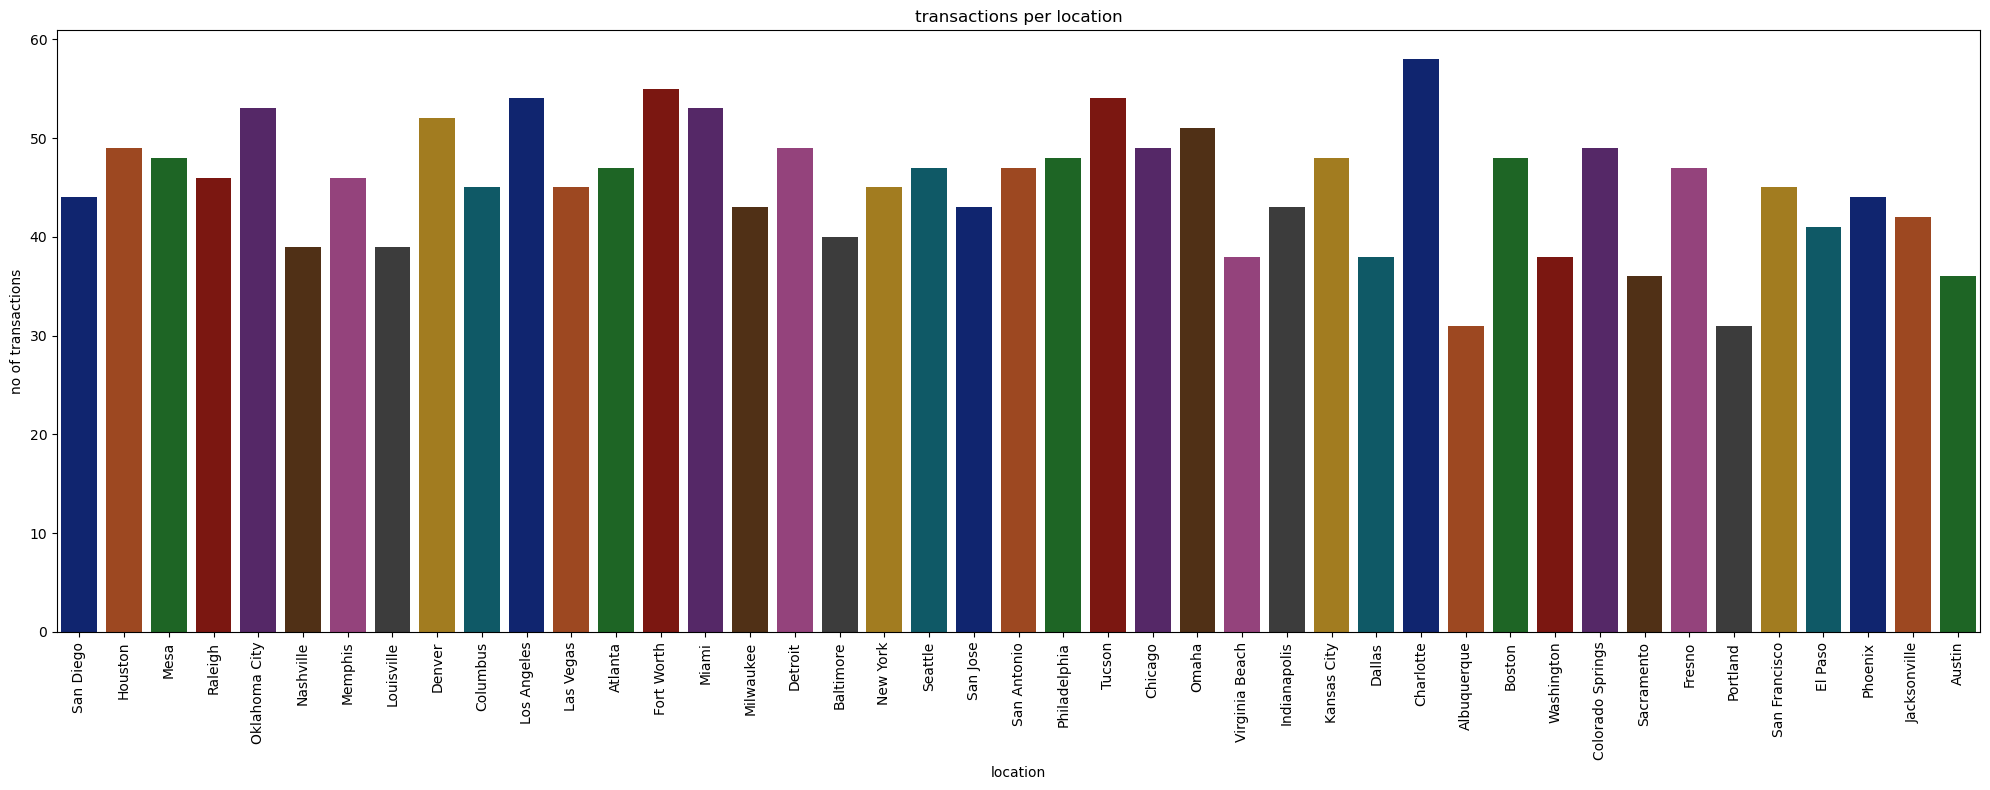

In [147]:
count_plot(20,8,'location', 'no of transactions', 'transactions per location', dataset, 'Location', rotation=90)

**Transaction activity by location**

In [148]:
dataset['Location'].value_counts().head(20)

Location
Charlotte           58
Fort Worth          55
Tucson              54
Los Angeles         54
Miami               53
Oklahoma City       53
Denver              52
Omaha               51
Detroit             49
Chicago             49
Houston             49
Colorado Springs    49
Philadelphia        48
Boston              48
Mesa                48
Kansas City         48
Fresno              47
Seattle             47
Atlanta             47
San Antonio         47
Name: count, dtype: int64

**Locations with highest tranaction volume, top 20**

In [149]:
dataset['IP Address'].value_counts().head(20)

IP Address
173.135.78.201     10
9.230.41.239        9
141.241.241.128     9
200.136.146.93      9
133.63.96.21        8
134.222.122.238     8
219.98.242.240      8
143.212.47.226      8
121.67.144.20       8
49.29.37.185        8
77.7.223.184        8
49.31.186.82        8
147.119.62.178      8
166.79.195.157      8
77.208.193.198      7
49.20.211.229       7
211.45.75.44        7
1.198.76.182        7
152.234.65.155      7
77.21.150.75        7
Name: count, dtype: int64

**IP address changes as per ISP**

In [150]:
dataset['TD']=pd.to_datetime(dataset['TransactionDate'])
dataset['Txn_date']=dataset['TD'].dt.date
dataset['Txn_time']=dataset['TD'].dt.time
dataset['Txn_hour']=dataset['TD'].dt.hour

**We separate  date and time from date-time column and plot no of transactions at every hour of day**

/var/folders/w0/_5c4mft945vchbzs2p863vvm0000gn/T/ipykernel_2073/3971858719.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=given, x=col_name,hue=hue, palette=palette, order=order)


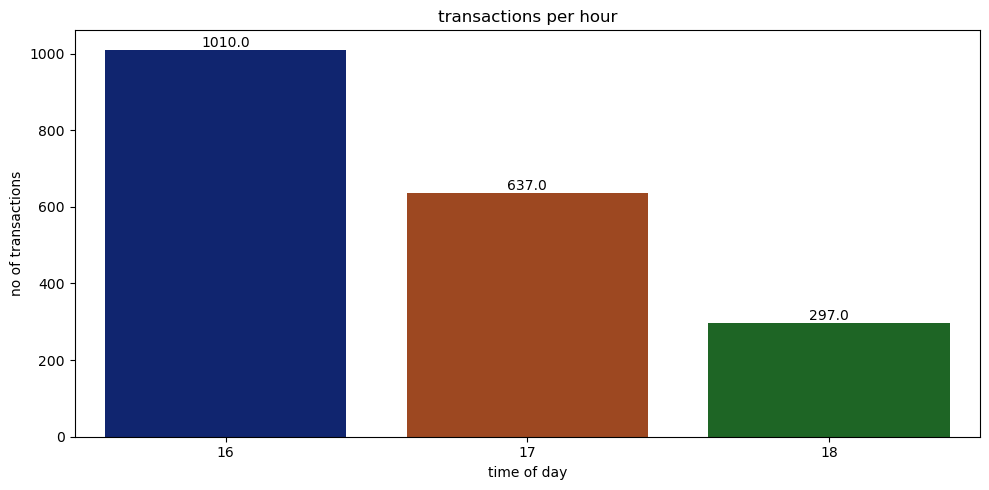

In [151]:
count_plot(10,5,'time of day', 'no of transactions', 'transactions per hour', dataset, 'Txn_hour', rotation=0, show_values=True)

/var/folders/w0/_5c4mft945vchbzs2p863vvm0000gn/T/ipykernel_2073/3971858719.py:33: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax=sns.histplot(data=given, x=col_name, bins=bins, kde=kde, palette=palette)


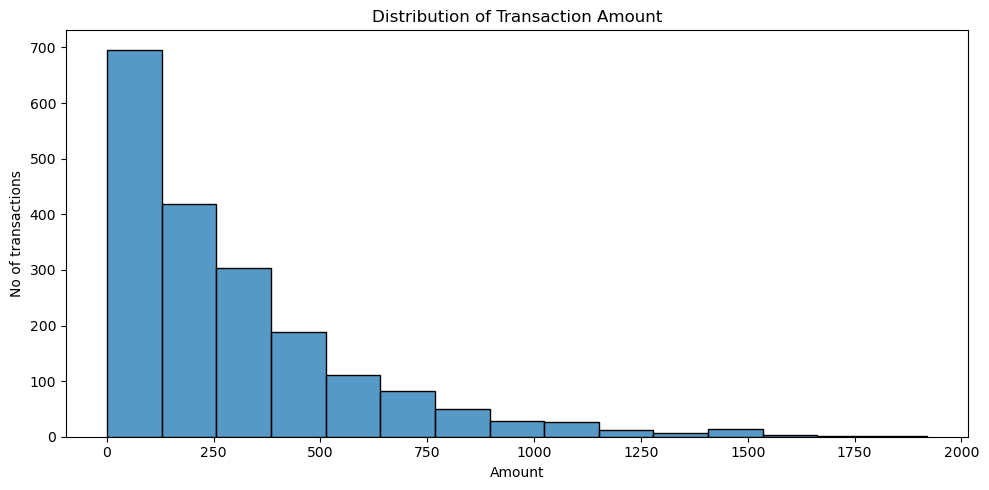

In [152]:
histplot(10,5,'Amount', 'No of transactions', 'Distribution of Transaction Amount', dataset, 'TransactionAmount',bins=15, kde=False, palette="dark", rotation=0)

/var/folders/w0/_5c4mft945vchbzs2p863vvm0000gn/T/ipykernel_2073/3971858719.py:33: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax=sns.histplot(data=given, x=col_name, bins=bins, kde=kde, palette=palette)


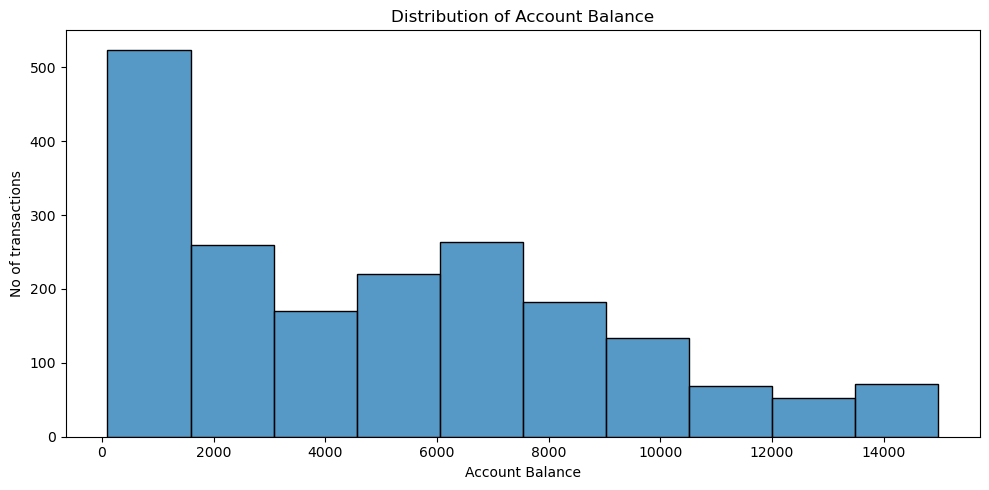

In [153]:
histplot(10,5,'Account Balance', 'No of transactions', 'Distribution of Account Balance', dataset, 'AccountBalance',bins=10, kde=False, palette="dark", rotation=0)

/var/folders/w0/_5c4mft945vchbzs2p863vvm0000gn/T/ipykernel_2073/3971858719.py:33: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax=sns.histplot(data=given, x=col_name, bins=bins, kde=kde, palette=palette)


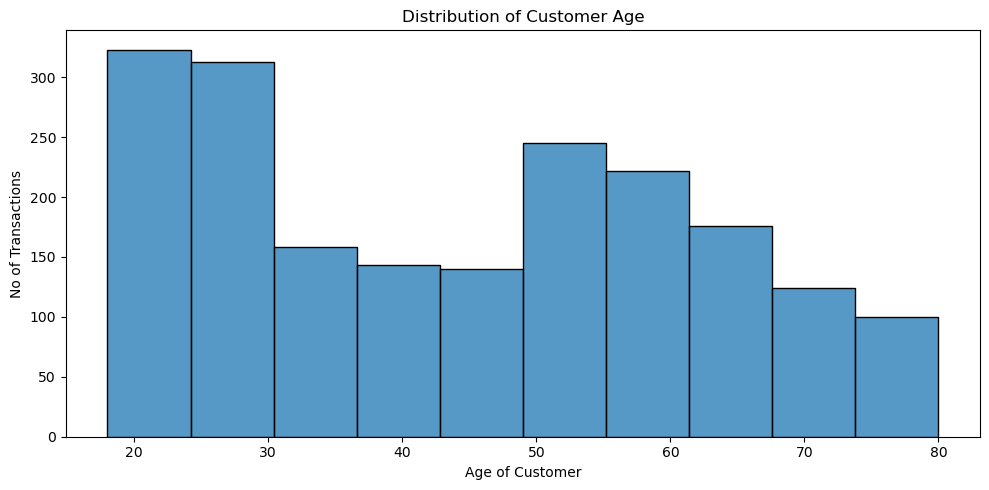

In [154]:
histplot(10,5,'Age of Customer', 'No of Transactions', 'Distribution of Customer Age', dataset, 'CustomerAge',bins=10, kde=False, palette="dark", rotation=0,)

In [155]:
#Number of devices per account
b=dataset.groupby('AccountID')['DeviceID'].nunique()
dataset['UniqueDevicesPerAcc']=dataset['AccountID'].map(b)

In [156]:
dataset.drop('Unnamed: 0', axis=1)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,...,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TxnPerAcc,TD,Txn_date,Txn_time,Txn_hour,UniqueDevicesPerAcc
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,...,81,1,5112.21,2024-11-04 08:08:08,5,2023-04-11 16:29:14,2023-04-11,16:29:14,16,5
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,...,141,1,13758.91,2024-11-04 08:09:35,7,2023-06-27 16:44:19,2023-06-27,16:44:19,16,6
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,...,56,1,1122.35,2024-11-04 08:07:04,3,2023-07-10 18:16:08,2023-07-10,18:16:08,18,3
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,...,25,1,8569.06,2024-11-04 08:09:06,6,2023-05-05 16:32:11,2023-05-05,16:32:11,16,6
4,TX000006,AC00393,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,D000579,117.67.192.211,M054,ATM,...,172,1,781.68,2024-11-04 08:06:36,5,2023-04-03 17:15:01,2023-04-03,17:15:01,17,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1939,TX002506,AC00377,577.12,2023-01-27 17:38:07,Debit,Virginia Beach,D000110,120.16.186.17,M075,ATM,...,69,1,5265.88,2024-11-04 08:10:50,4,2023-01-27 17:38:07,2023-01-27,17:38:07,17,4
1940,TX002507,AC00258,92.24,2023-04-13 17:45:33,Debit,Philadelphia,D000531,189.183.50.147,M076,Branch,...,93,1,6937.48,2024-11-04 08:09:06,4,2023-04-13 17:45:33,2023-04-13,17:45:33,17,4
1941,TX002509,AC00322,251.54,2023-03-22 17:36:48,Debit,Tucson,D000410,49.174.157.140,M029,Branch,...,177,1,254.75,2024-11-04 08:11:42,9,2023-03-22 17:36:48,2023-03-22,17:36:48,17,9
1942,TX002510,AC00095,28.63,2023-08-21 17:08:50,Debit,San Diego,D000095,58.1.27.124,M087,Branch,...,146,1,3382.91,2024-11-04 08:08:39,5,2023-08-21 17:08:50,2023-08-21,17:08:50,17,5


/var/folders/w0/_5c4mft945vchbzs2p863vvm0000gn/T/ipykernel_2073/3971858719.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=given, x=col_name,hue=hue, palette=palette, order=order)


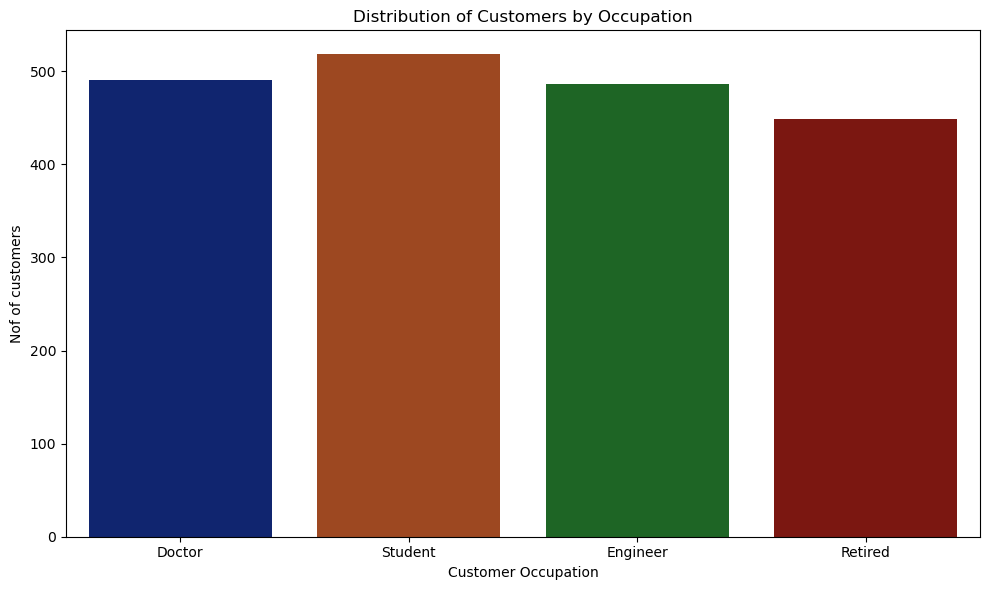

In [157]:
#distribution of cutomer by occupation barplot
count_plot(10, 6, 'Customer Occupation', 'Nof of customers', 'Distribution of Customers by Occupation', dataset, 'CustomerOccupation')

In [158]:
# Step 1: Group by occupation and count unique AccountIDs
occupation_counts = dataset.groupby('CustomerOccupation')['AccountID'].nunique().reset_index()
occupation_counts.columns = ['CustomerOccupation', 'UniqueCustomers']

In [159]:
occupation_counts

,CustomerOccupation,UniqueCustomers
0,Doctor,319
1,Engineer,314
2,Retired,285
3,Student,319


/var/folders/w0/_5c4mft945vchbzs2p863vvm0000gn/T/ipykernel_2073/3971858719.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=X, y=Y, data=Data, palette=palette)


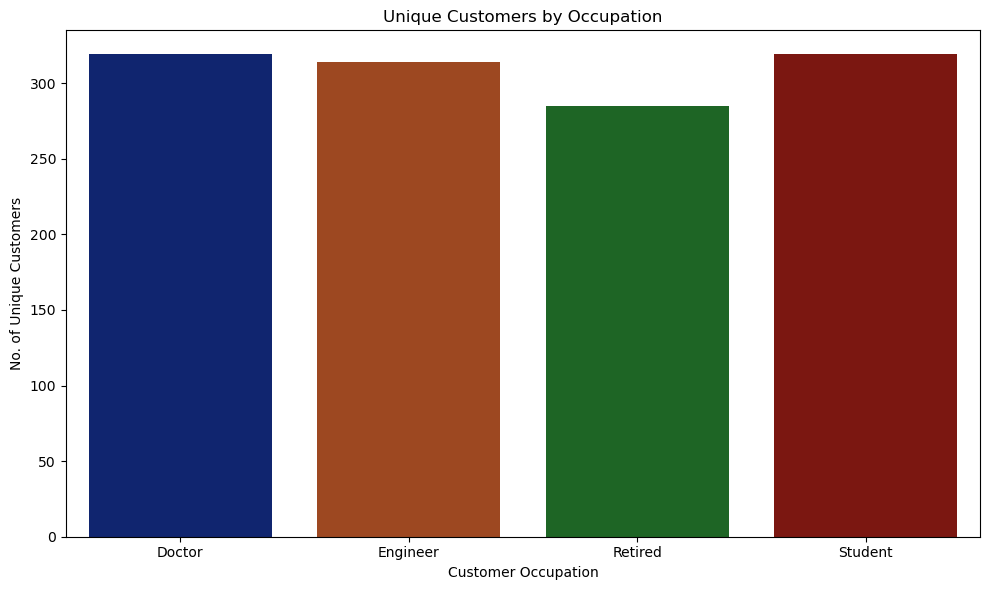

In [160]:
# Custom bar plot using pre-aggregated data
bar_plot(
    length=10, width=6,
    xlabel='Customer Occupation',
    ylabel='No. of Unique Customers',
    title='Unique Customers by Occupation',
    X='CustomerOccupation', Y='UniqueCustomers',
    Data=occupation_counts,
    palette='dark'
)

/var/folders/w0/_5c4mft945vchbzs2p863vvm0000gn/T/ipykernel_2073/3971858719.py:33: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax=sns.histplot(data=given, x=col_name, bins=bins, kde=kde, palette=palette)


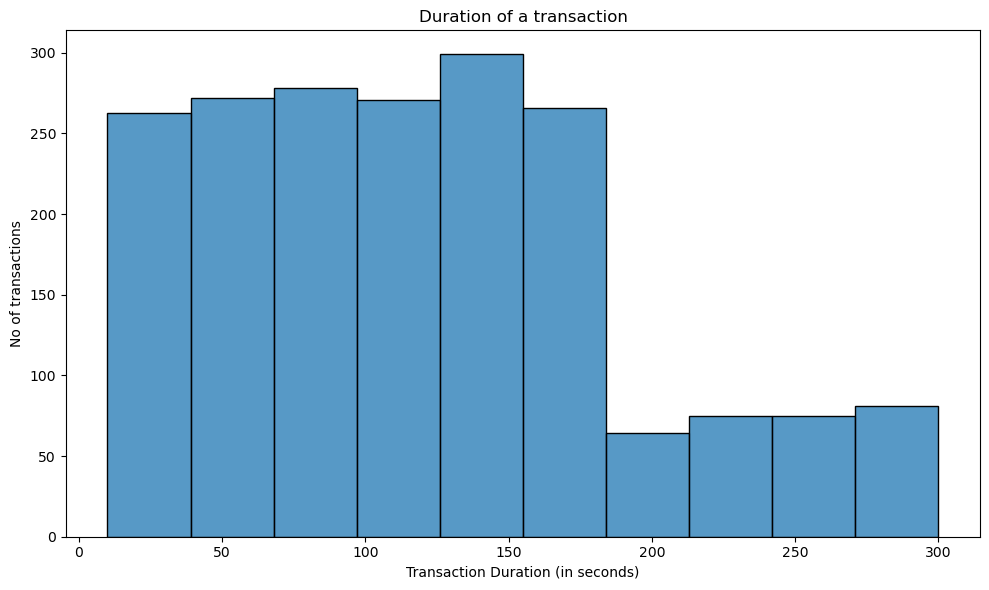

In [161]:
#Transaction duration histogram
histplot(10,6,'Transaction Duration (in seconds)', 'No of transactions', 'Duration of a transaction', dataset, 'TransactionDuration')

/var/folders/w0/_5c4mft945vchbzs2p863vvm0000gn/T/ipykernel_2073/3971858719.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=given, x=col_name,hue=hue, palette=palette, order=order)


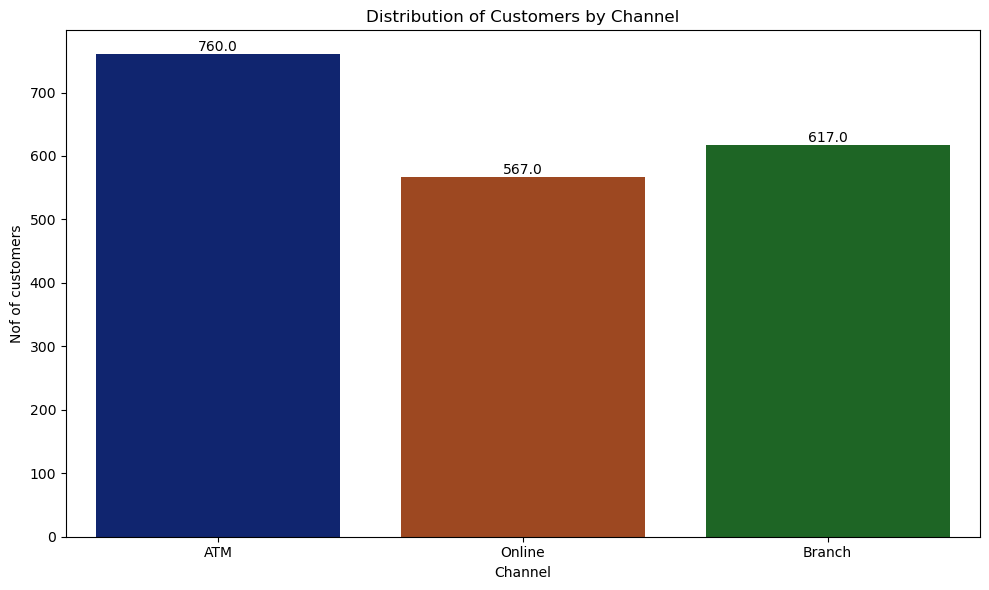

In [162]:
#Channel distribution
count_plot(10, 6, 'Channel', 'Nof of customers', 'Distribution of Customers by Channel', dataset, 'Channel', show_values=True)

In [163]:
#bin customer ages histogram
bins_1=[17,25,40,60,80]
labels_1=['Young_Adults', 'Established_Adult', 'Middle_Aged', 'Retired']
dataset['AgeBins']=pd.cut(dataset['CustomerAge'], bins=bins_1, labels=labels_1, right=True)

In [164]:
#account balance bins
bins_2=[0,5000,10000,16000]
labels_2=['Low', 'Medium', 'High']
dataset['AcBalanceBins']=pd.cut(dataset['AccountBalance'], bins=bins_2, labels=labels_2, right=True)

In [165]:
#location bins by activity
c=dataset['Location'].value_counts()
dataset['LocFreq']=dataset['Location'].map(c)

In [166]:
#high activity merchants
d=dataset['MerchantID'].value_counts()
dataset['MerFreq']=dataset['MerchantID'].map(d)
bins_3=[0,10,20,30]
labels_3=['Low_Activity', 'Medium_Activity', 'High_Activity']
dataset['MerBins']=pd.cut(dataset['MerFreq'], bins=bins_3, labels=labels_3, right=True)

In [167]:
#transaction duration bins
bins_4=[0,100,200,300]
labels_4=['Low_Duration', 'Medium_Duration', 'High_Duration']
dataset['DurBins']=pd.cut(dataset['TransactionDuration'], bins=bins_4, labels=labels_4, right=True)

/var/folders/w0/_5c4mft945vchbzs2p863vvm0000gn/T/ipykernel_2073/3971858719.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=X, y=Y, data=Data, palette=palette)


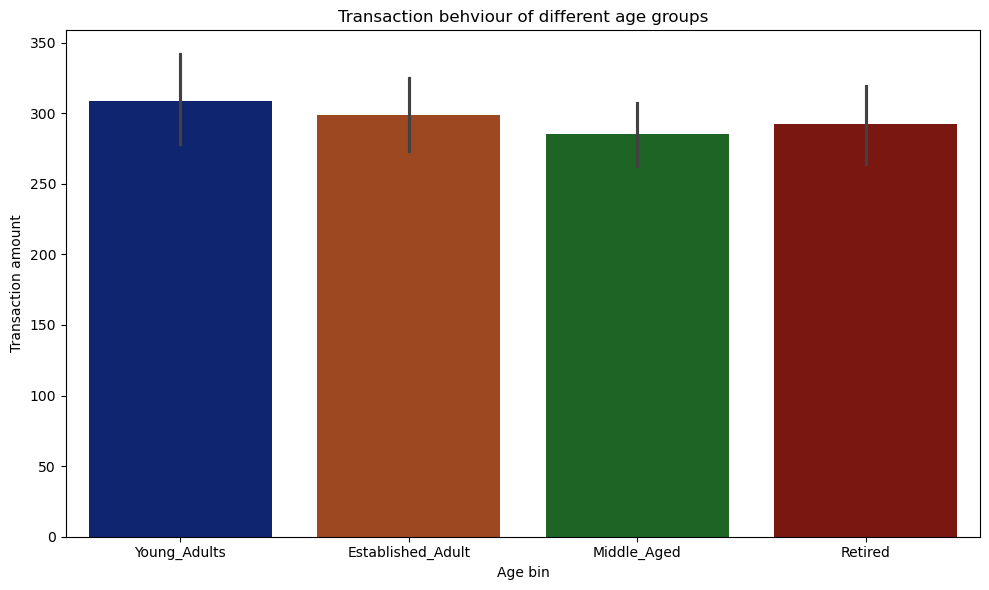

In [168]:
bar_plot(10,6,'Age bin','Transaction amount','Transaction behviour of different age groups','AgeBins','TransactionAmount',dataset)

**Avg Transaction amount of each age group**

In [169]:
bins_5=[0,100,400,2000]
labels_5=['Low_Amt', 'Medium_Amt', 'High_Amt'] #, 'VeryHigh_amt'
dataset['AmtBins']=pd.cut(dataset['TransactionAmount'], bins=bins_5, labels=labels_5, right=True)

/var/folders/w0/_5c4mft945vchbzs2p863vvm0000gn/T/ipykernel_2073/3971858719.py:44: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax=sns.scatterplot(x=x, y=y, data=given,size='LoginAttempts', sizes=(20, 200), palette=palette)


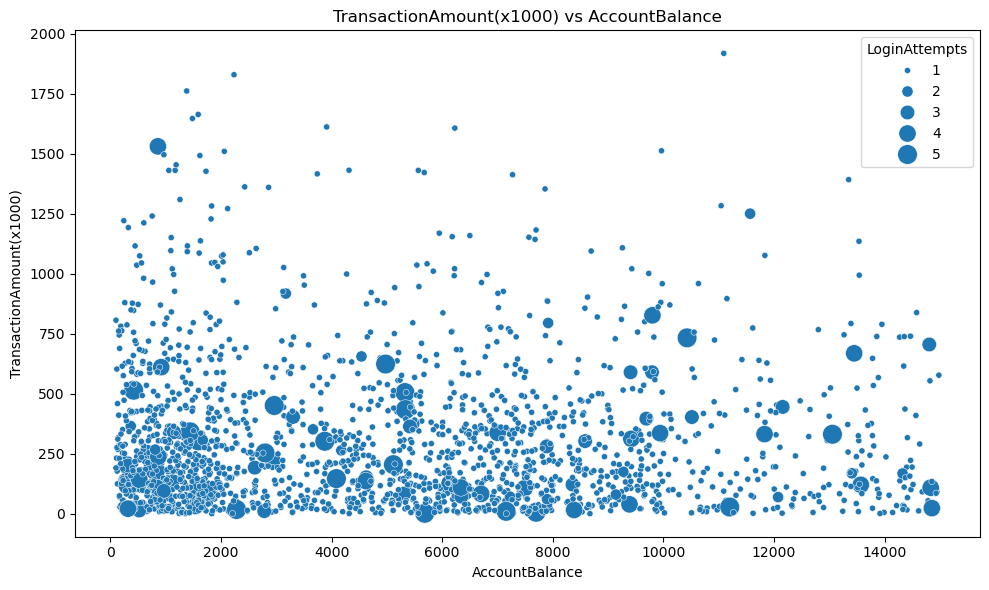

In [170]:
scatter_plot(10,6,'AccountBalance','TransactionAmount(x1000)','TransactionAmount(x1000) vs AccountBalance',dataset,'AccountBalance','TransactionAmount')

In [171]:
merchant_usage = dataset.groupby('MerchantID').agg({
    'TransactionID': 'count',  # Number of transactions per merchant
    'TransactionAmount': 'mean'  # Average transaction amount per merchant
}).reset_index().rename(columns={'TransactionID': 'TransactionCount'})

merchant_usage

,MerchantID,TransactionCount,TransactionAmount
0,M001,21,216.656190
1,M002,23,278.597391
2,M003,23,211.353913
3,M004,20,361.104000
4,M005,27,329.537037
...,...,...,...
95,M096,21,263.836190
96,M097,18,330.917778
97,M098,20,289.209500
98,M099,23,267.516957


In [172]:
top_merchants = merchant_usage.nlargest(10, 'TransactionCount')
top_merchants

,MerchantID,TransactionCount,TransactionAmount
25,M026,29,266.697586
37,M038,28,341.667857
4,M005,27,329.537037
14,M015,27,304.359259
24,M025,26,246.233077
59,M060,26,288.166154
87,M088,26,307.877692
12,M013,25,360.031600
41,M042,25,324.377200
61,M062,25,261.571600


/var/folders/w0/_5c4mft945vchbzs2p863vvm0000gn/T/ipykernel_2073/2059022220.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='MerchantID', y='TransactionAmount',


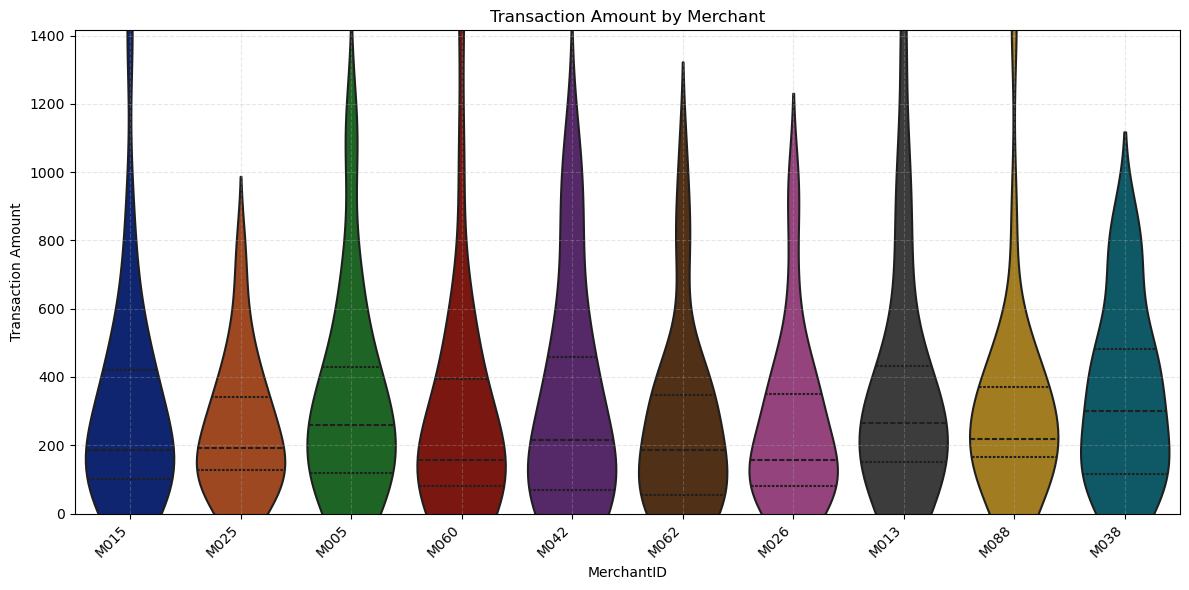

In [173]:
plt.figure(figsize=(12, 6))
plt.title('Transaction Amount by Merchant')
plt.xlabel('MerchantID')
plt.ylabel('Transaction Amount')

sns.violinplot(x='MerchantID', y='TransactionAmount', 
               data=dataset[dataset['MerchantID'].isin(top_merchants['MerchantID'])], 
               palette='dark', inner='quartile', linewidth=1.5)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylim(0, dataset['TransactionAmount'].quantile(0.99))
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

**One Hot Encoding Categorical Features**

In [174]:
channel_dummies=pd.get_dummies(dataset['Channel'], prefix='Channel').astype(int)
dataset=pd.concat([dataset,channel_dummies],axis=1)

In [175]:
occ_dummies=pd.get_dummies(dataset['CustomerOccupation'], prefix='Occ').astype(int)
dataset=pd.concat([dataset,occ_dummies],axis=1)

In [176]:
age_dummies=pd.get_dummies(dataset['AgeBins'], prefix='Age').astype(int)
dataset=pd.concat([dataset,age_dummies],axis=1)

In [177]:
bal_dummies=pd.get_dummies(dataset['AcBalanceBins'], prefix='Bal').astype(int)
dataset=pd.concat([dataset,bal_dummies],axis=1)

In [178]:
mer_dummies=pd.get_dummies(dataset['MerBins'], prefix='Mer').astype(int)
dataset=pd.concat([dataset,mer_dummies],axis=1)

In [179]:
dur_dummies=pd.get_dummies(dataset['DurBins'], prefix='Dur').astype(int)
dataset=pd.concat([dataset,dur_dummies],axis=1)

In [180]:
amt_dummies=pd.get_dummies(dataset['AmtBins'], prefix='Amt').astype(int)
dataset=pd.concat([dataset,amt_dummies],axis=1)

**ANOMALY DETECTION**

In [181]:
dataset.columns

Index(['Unnamed: 0', 'TransactionID', 'AccountID', 'TransactionAmount',
       'TransactionDate', 'TransactionType', 'Location', 'DeviceID',
       'IP Address', 'MerchantID', 'Channel', 'CustomerAge',
       'CustomerOccupation', 'TransactionDuration', 'LoginAttempts',
       'AccountBalance', 'PreviousTransactionDate', 'TxnPerAcc', 'TD',
       'Txn_date', 'Txn_time', 'Txn_hour', 'UniqueDevicesPerAcc', 'AgeBins',
       'AcBalanceBins', 'LocFreq', 'MerFreq', 'MerBins', 'DurBins', 'AmtBins',
       'Channel_ATM', 'Channel_Branch', 'Channel_Online', 'Occ_Doctor',
       'Occ_Engineer', 'Occ_Retired', 'Occ_Student', 'Age_Young_Adults',
       'Age_Established_Adult', 'Age_Middle_Aged', 'Age_Retired', 'Bal_Low',
       'Bal_Medium', 'Bal_High', 'Mer_Low_Activity', 'Mer_Medium_Activity',
       'Mer_High_Activity', 'Dur_Low_Duration', 'Dur_Medium_Duration',
       'Dur_High_Duration', 'Amt_Low_Amt', 'Amt_Medium_Amt', 'Amt_High_Amt'],
      dtype='object')

<Axes: >

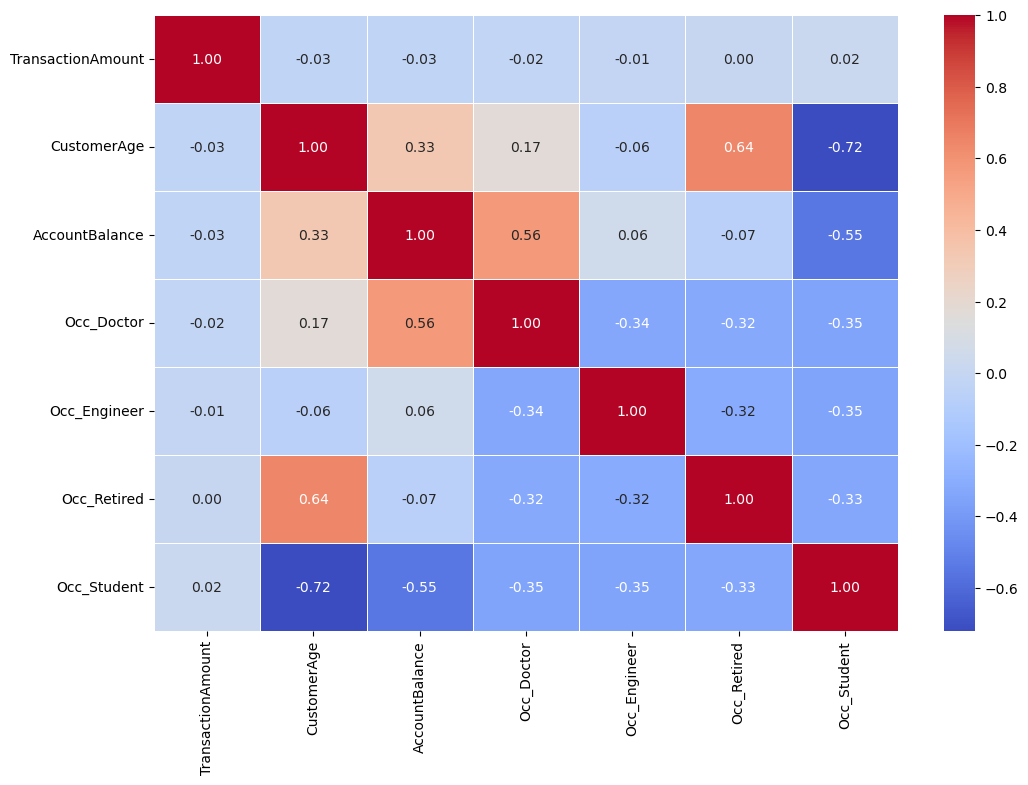

In [182]:
selected_cols = ['TransactionAmount', 
       'CustomerAge','AccountBalance', 'Occ_Doctor', 'Occ_Engineer', 'Occ_Retired',
       'Occ_Student']
plt.figure(figsize=(12, 8))
sns.heatmap(dataset[selected_cols].corr(),fmt=".2f",
            linewidths=0.5, annot=True, cmap='coolwarm')

In [183]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

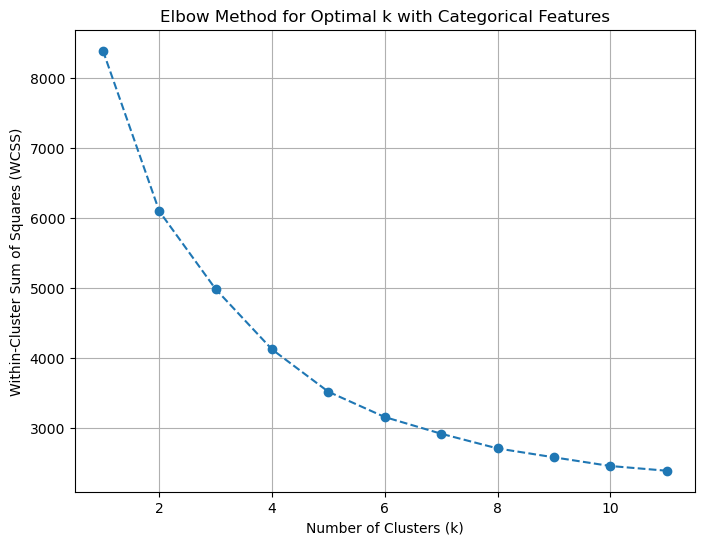

In [184]:
numerical_features = ['TransactionAmount', 'AccountBalance','CustomerAge']
categorical_features = ['CustomerOccupation','Channel','AcBalanceBins']

# Numerical data preprocessing
X_num = dataset[numerical_features]
#X_num = X_num.fillna(X_num.median())  # Impute with median
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)

# Categorical data preprocessing (one-hot encoding)
X_cat = pd.get_dummies(dataset[categorical_features], drop_first=True)  # drop_first to avoid multicollinearity

# Combine numerical and categorical features
X_combined = np.hstack((X_num_scaled, X_cat.values))

# Calculate WCSS for a range of k values (elbow method)
wcss = []
k_range = range(1, 12)  # Test k from 1 to 12
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=5)
    kmeans.fit(X_combined)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k with Categorical Features')
plt.grid(True)
plt.show()

In [185]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_combined)
    wcss.append(kmeans.inertia_)
    
    if k > 1: 
        score = silhouette_score(X_combined, kmeans.labels_)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(np.nan)

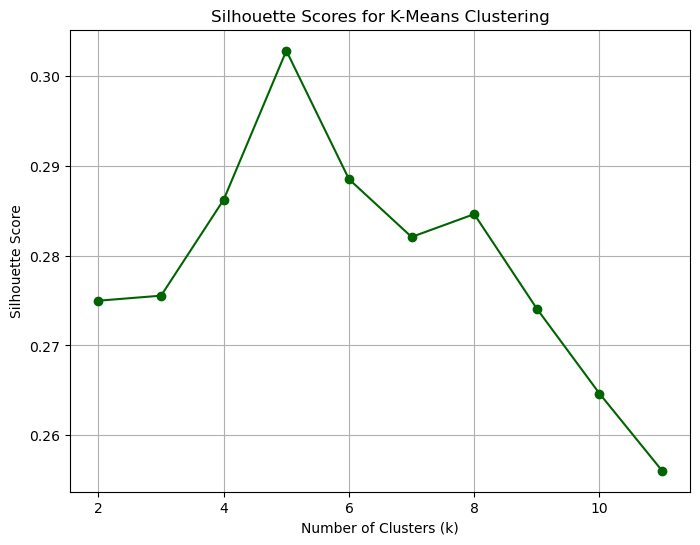

In [186]:
plt.figure(figsize=(8, 6))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-', color='darkgreen')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for K-Means Clustering')
plt.grid(True)
plt.show()

In [187]:
# Fit K-means with k=5
kmeans = KMeans(n_clusters=5, random_state=0, n_init=10)
kmeans.fit(X_combined)

dataset['Cluster'] = kmeans.labels_
dataset['DistanceToCentroid'] = np.linalg.norm(X_combined - kmeans.cluster_centers_[kmeans.labels_], axis=1)

# Identify potential frauds based on distance threshold (97th percentile)
threshold = dataset['DistanceToCentroid'].quantile(0.97)
dataset['PotentialFraud'] = dataset['DistanceToCentroid'] > threshold
fraud_df = dataset[dataset['PotentialFraud']].copy()
print('Total Potential Frauds',fraud_df.shape[0] )
fraud_df

Total Potential Frauds 59


,Unnamed: 0,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,...,Mer_High_Activity,Dur_Low_Duration,Dur_Medium_Duration,Dur_High_Duration,Amt_Low_Amt,Amt_Medium_Amt,Amt_High_Amt,Cluster,DistanceToCentroid,PotentialFraud
52,74,TX000075,AC00265,1212.51,2023-10-04 16:36:29,Debit,Indianapolis,D000231,193.83.0.183,M036,...,0,1,0,0,0,0,1,1,2.141313,True
103,141,TX000142,AC00114,1049.92,2023-10-23 16:50:33,Debit,Detroit,D000522,121.67.144.20,M052,...,1,1,0,0,0,0,1,1,2.451848,True
106,146,TX000147,AC00385,973.39,2023-08-30 17:23:20,Debit,Sacramento,D000292,202.194.199.70,M026,...,1,0,0,1,0,0,1,1,2.391454,True
137,186,TX000187,AC00099,1041.88,2023-09-06 16:44:02,Debit,Jacksonville,D000208,32.240.176.64,M032,...,0,1,0,0,0,0,1,1,2.407983,True
140,190,TX000191,AC00396,1422.55,2023-07-10 17:49:18,Debit,Washington,D000569,188.124.181.12,M072,...,0,0,1,0,0,0,1,1,2.859587,True
218,294,TX000295,AC00148,757.41,2023-05-05 16:31:53,Debit,Los Angeles,D000383,125.89.163.224,M048,...,0,1,0,0,0,0,1,1,2.218941,True
247,327,TX000328,AC00434,870.43,2023-05-31 16:54:20,Debit,Los Angeles,D000427,178.34.103.183,M037,...,0,1,0,0,0,0,1,1,2.166123,True
260,340,TX000341,AC00107,1830.00,2023-03-01 16:31:58,Debit,San Antonio,D000436,62.27.235.199,M082,...,0,0,0,1,0,0,1,1,3.198585,True
291,375,TX000376,AC00316,1392.54,2023-11-20 16:51:14,Debit,El Paso,D000113,63.67.150.226,M013,...,1,0,0,1,0,0,1,1,2.975303,True
334,428,TX000429,AC00182,677.29,2023-05-01 18:28:00,Debit,Houston,D000016,49.172.82.247,M015,...,1,0,0,1,0,0,1,1,2.071905,True


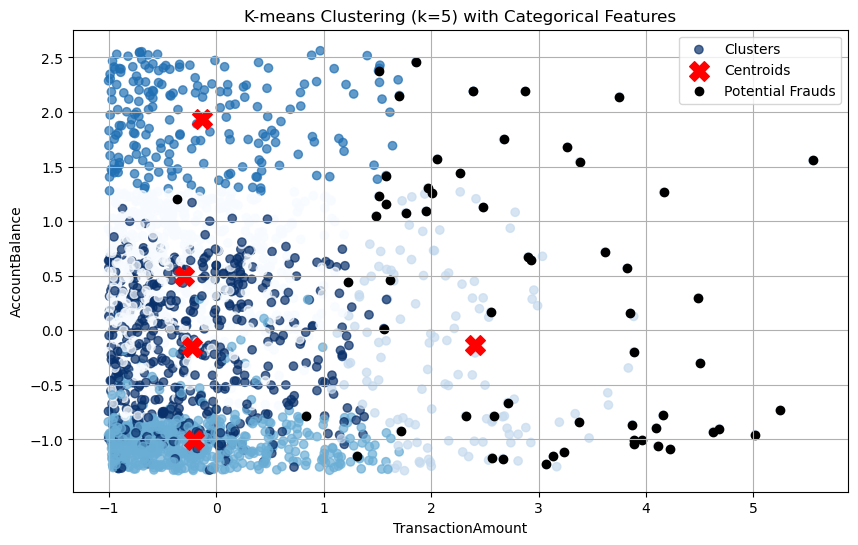

In [188]:
plt.figure(figsize=(10, 6))

plt.scatter(X_num_scaled[:, 0], X_num_scaled[:, 1], 
            c=kmeans.labels_, cmap="Blues", alpha=0.7, label='Clusters')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='red', marker='X', label='Centroids')
fraud_indices = dataset['PotentialFraud']
plt.scatter(X_num_scaled[fraud_indices, 0], X_num_scaled[fraud_indices, 1], 
            c='black', marker='o', label='Potential Frauds')
plt.xlabel(numerical_features[0])  # TransactionAmount
plt.ylabel(numerical_features[1])  # AccountBalance
plt.title('K-means Clustering (k=5) with Categorical Features')
plt.legend()
plt.grid(True)
plt.show()

In [189]:
fraud_df

,Unnamed: 0,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,...,Mer_High_Activity,Dur_Low_Duration,Dur_Medium_Duration,Dur_High_Duration,Amt_Low_Amt,Amt_Medium_Amt,Amt_High_Amt,Cluster,DistanceToCentroid,PotentialFraud
52,74,TX000075,AC00265,1212.51,2023-10-04 16:36:29,Debit,Indianapolis,D000231,193.83.0.183,M036,...,0,1,0,0,0,0,1,1,2.141313,True
103,141,TX000142,AC00114,1049.92,2023-10-23 16:50:33,Debit,Detroit,D000522,121.67.144.20,M052,...,1,1,0,0,0,0,1,1,2.451848,True
106,146,TX000147,AC00385,973.39,2023-08-30 17:23:20,Debit,Sacramento,D000292,202.194.199.70,M026,...,1,0,0,1,0,0,1,1,2.391454,True
137,186,TX000187,AC00099,1041.88,2023-09-06 16:44:02,Debit,Jacksonville,D000208,32.240.176.64,M032,...,0,1,0,0,0,0,1,1,2.407983,True
140,190,TX000191,AC00396,1422.55,2023-07-10 17:49:18,Debit,Washington,D000569,188.124.181.12,M072,...,0,0,1,0,0,0,1,1,2.859587,True
218,294,TX000295,AC00148,757.41,2023-05-05 16:31:53,Debit,Los Angeles,D000383,125.89.163.224,M048,...,0,1,0,0,0,0,1,1,2.218941,True
247,327,TX000328,AC00434,870.43,2023-05-31 16:54:20,Debit,Los Angeles,D000427,178.34.103.183,M037,...,0,1,0,0,0,0,1,1,2.166123,True
260,340,TX000341,AC00107,1830.00,2023-03-01 16:31:58,Debit,San Antonio,D000436,62.27.235.199,M082,...,0,0,0,1,0,0,1,1,3.198585,True
291,375,TX000376,AC00316,1392.54,2023-11-20 16:51:14,Debit,El Paso,D000113,63.67.150.226,M013,...,1,0,0,1,0,0,1,1,2.975303,True
334,428,TX000429,AC00182,677.29,2023-05-01 18:28:00,Debit,Houston,D000016,49.172.82.247,M015,...,1,0,0,1,0,0,1,1,2.071905,True
